# 1. Import Libararies and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
# create path
path = r'/Users/mimielaurant/Documents/Career Foundry/Immersion_Achievement 6/Citibike Project'

In [5]:
data = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'citibikes_new.csv'), index_col = False)

In [5]:
data.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38


In [6]:
data = data.drop(columns = ['Unnamed: 0'])

# 2. Data Cleaning

In [8]:
data.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'age',
       'Trip Range', 'trip_minutes'],
      dtype='object')

In [9]:
data.head(20)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38
5,HbKJBz,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,...,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986-01-01,2,27.740248,average trip,7
6,aOKk3s,15022,Sun,13,2013-09-29 13:13:06,380,W 4 St & 7 Ave S,40.734011,-74.002939,2013-09-29 13:23:45,...,E 6 St & Avenue B,40.724537,-73.981854,639,Subscriber,1994-01-01,1,19.744555,average trip,10
7,kpcluW,16253,Sat,10,2013-09-21 10:48:14,346,Bank St & Hudson St,40.736529,-74.006180,2013-09-21 10:52:37,...,W 16 St & The High Line,40.743349,-74.006818,263,Subscriber,1969-01-01,1,44.722206,short trip,4
8,GC8mJC,16745,Fri,12,2013-09-20 12:29:49,510,W 51 St & 6 Ave,40.760660,-73.980420,2013-09-20 12:40:55,...,W 59 St & 10 Ave,40.770513,-73.988038,666,Subscriber,1993-01-01,1,20.719168,average trip,11
9,qyXq7X,19556,Tue,16,2013-09-03 16:56:06,446,W 24 St & 7 Ave,40.744876,-73.995299,2013-09-03 17:05:48,...,Columbia St & Rivington St,40.717400,-73.980166,582,Subscriber,1983-01-01,1,30.674704,average trip,9


In [10]:
data.shape

(49977, 21)

## Missing values

In [11]:
# check for missing values
data.isnull().sum()

# no missing values

trip_id                    0
bike_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
age                        0
Trip Range                 0
trip_minutes               0
dtype: int64

## Duplicates Check

In [22]:
dups = data.duplicated()

In [23]:
dups.shape # no dups

(49977,)

## Extreme values check

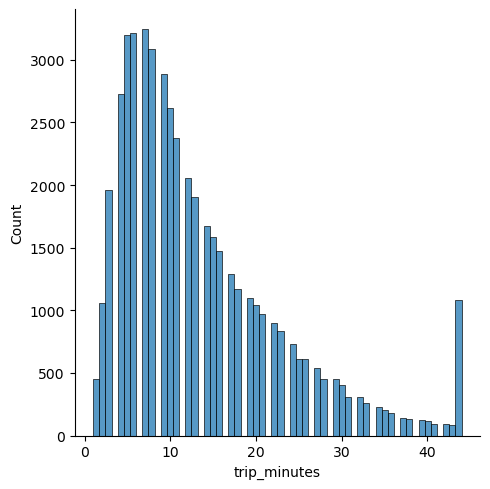

In [18]:
sns.displot(data['trip_minutes'], bins=60) # Shows extreme values

In [19]:
data['trip_minutes'].mean() # check the mean

13.480821177741761

In [20]:
data['trip_minutes'].median() # check the median

11.0

In [21]:
data['trip_minutes'].max() # check the max

44

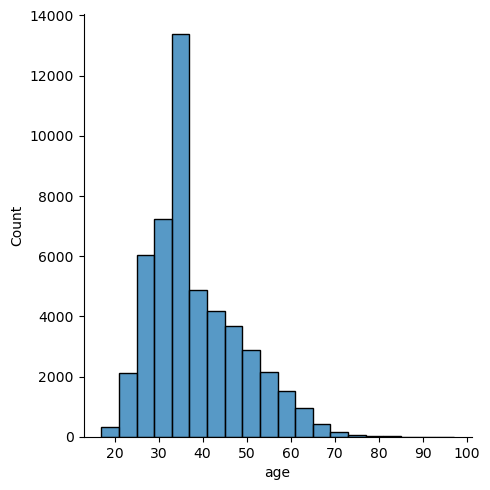

In [37]:
sns.displot(data['age'], bins=20) # Shows extreme values

# 3. Data Prep for Regression Analysis

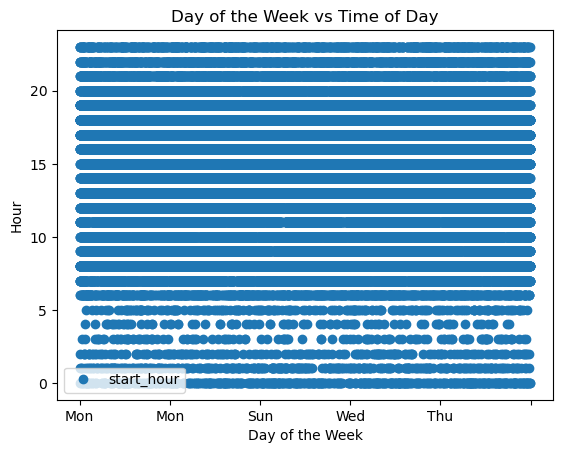

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'weekday', y='start_hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Day of the Week vs Time of Day')  
plt.xlabel('Day of the Week')  
plt.ylabel('Hour')  

# Save the scatterplot as an image file (e.g., PNG)
plt.savefig('scatterplot.png')

# Display the plot
plt.show()

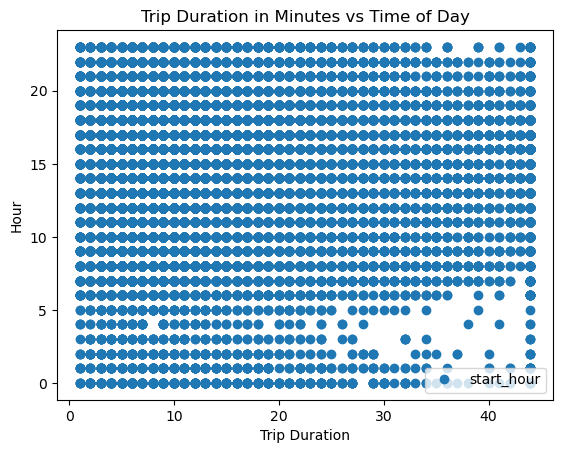

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'trip_minutes', y='start_hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trip Duration in Minutes vs Time of Day')  
plt.xlabel('Trip Duration')  
plt.ylabel('Hour')  
plt.show()

In [30]:
# round the age column to the nearest whole number

data['age'] = data['age'].round()

In [32]:
data.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968-01-01,2,46.0,long trip,16
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983-01-01,1,31.0,average trip,9
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989-01-01,1,25.0,average trip,6
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988-01-01,2,26.0,average trip,9
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,36.0,long trip,38


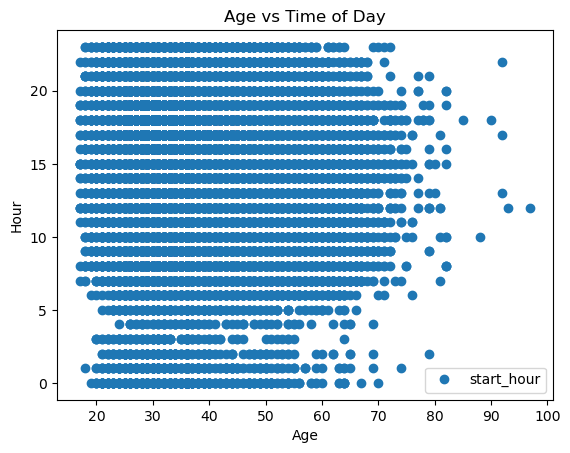

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'age', y='start_hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Time of Day')  
plt.xlabel('Age')  
plt.ylabel('Hour')  
plt.show()

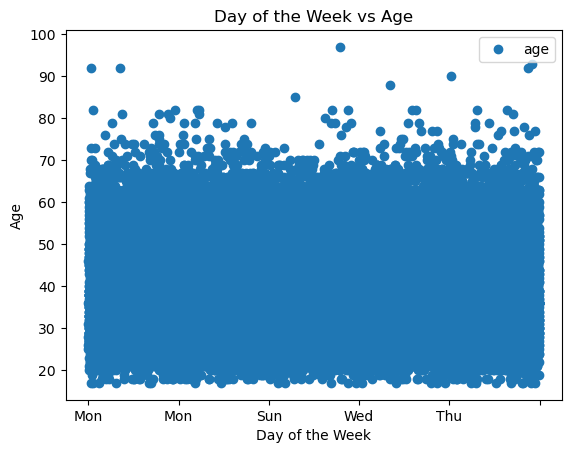

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'weekday', y='age',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Day of the Week vs Age')  
plt.xlabel('Day of the Week')  
plt.ylabel('Age')  
plt.show()

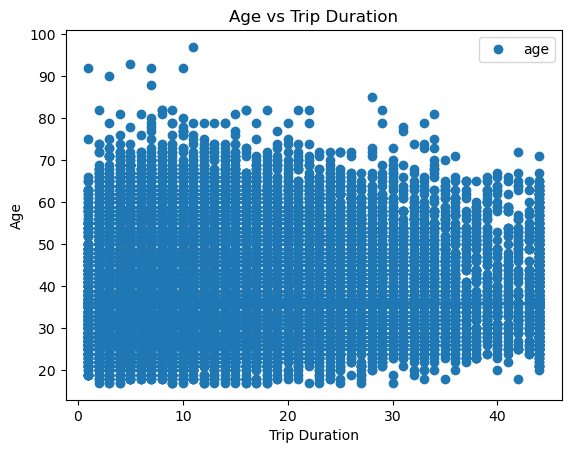

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'trip_minutes', y='age',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Trip Duration')  
plt.xlabel('Trip Duration')  
plt.ylabel('Age')  
plt.show()

Even though all these scatterplots look similar, I am curious about the relationship between start_hour and trip_minutes, and age and trip_minutes.

## Reshaping start_hour and trip_minutes

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = data['start_hour'].values.reshape(-1,1)
y = data['trip_minutes'].values.reshape(-1,1)

In [39]:
X

array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]])

In [40]:
y

array([[16],
       [ 9],
       [ 6],
       ...,
       [17],
       [44],
       [ 6]])

In [41]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [42]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [43]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

I predict that there will be longer trips in the morning and evening hours as people people use bikes to commute to work and home.

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

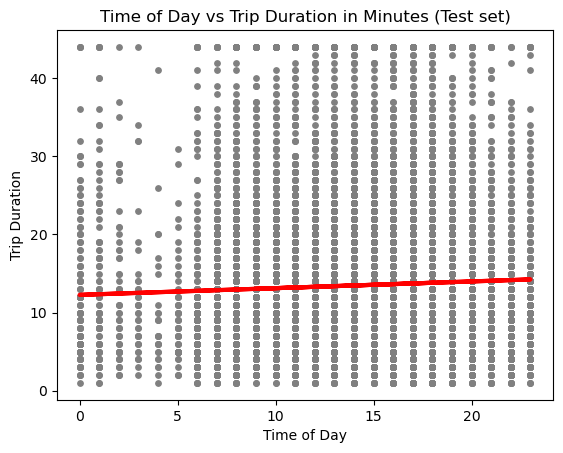

In [45]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Time of Day vs Trip Duration in Minutes (Test set)')
plot_test.xlabel('Time of Day')
plot_test.ylabel('Trip Duration')
plot_test.show()

There is a very small, positive slope to the regression line.

In [46]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [47]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08611051]]
Mean squared error:  90.72443151526987
R2 score:  0.0011316841870323557


In [48]:
y_predicted

array([[13.81701689],
       [13.21424335],
       [13.30035386],
       ...,
       [13.21424335],
       [13.81701689],
       [13.04202234]])

In [49]:
# Create a dataframe comparing the actual and predicted values of y.

data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,8,13.817017
1,5,13.214243
2,11,13.300354
3,11,13.214243
4,14,13.730906
5,8,13.730906
6,9,13.472575
7,26,13.472575
8,18,13.644796
9,6,13.128133


The predicted values do not refelct the actual fluctuation between the hours.

In [50]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [51]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08611051]]
Mean squared error:  90.75948314940833
R2 score:  0.0019307683102782747


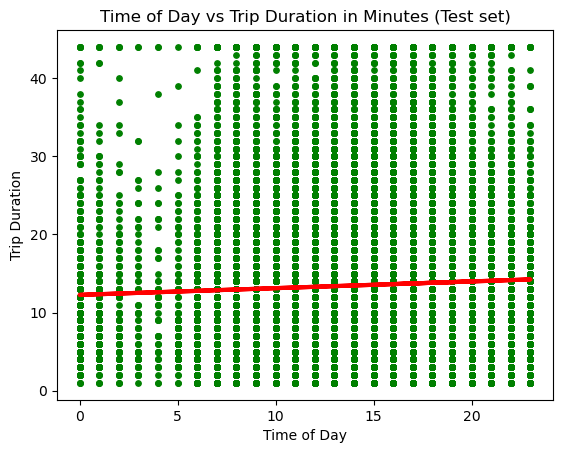

In [53]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Time of Day vs Trip Duration in Minutes (Test set)')
plot_test.xlabel('Time of Day')
plot_test.ylabel('Trip Duration')
plot_test.show()